# Simple Recommender Systems with Python

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

## User Data

In [12]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [13]:
df = pd.read_csv('u.data', names=column_names, sep='\t')

In [14]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


## Movie Data

In [16]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [17]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging `title` to the user table

In [18]:
df = pd.merge(df, movie_titles, on='item_id')

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA


### Which are the best rated movie (on average)?

In [23]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)[:5]

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

But the above data doesn't show the complete story. There may be movies which had been rated by a few people with high rating.

### What are the most rated movies?

In [27]:
df.groupby('title')['rating'].count().sort_values(ascending=False)[:5]

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

### to get the complete picture, we will combine those data together

In [28]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [29]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [30]:
# add number of ratings
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [31]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Visualization of data

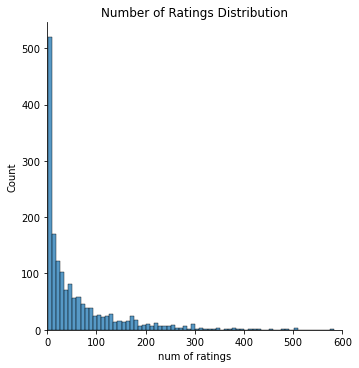

In [37]:
sns.displot(ratings['num of ratings'], bins=70);
plt.xlim(0, 600)
plt.title('Number of Ratings Distribution');

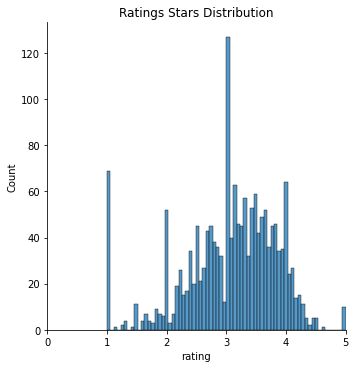

In [43]:
sns.displot(ratings['rating'], bins=70);
plt.xlim(0, 5)
plt.title('Ratings Stars Distribution');

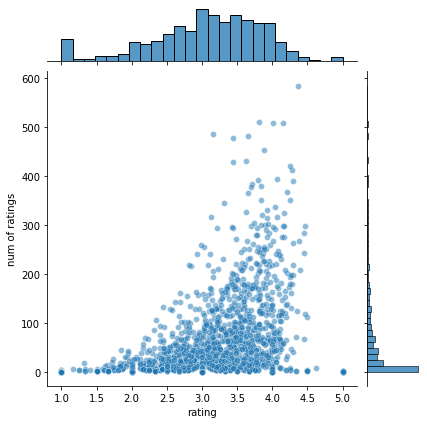

In [47]:
sns.jointplot(data=ratings, x='rating', y='num of ratings', alpha=0.5);

We can see that the higher the rating, also increase in number of ratings. This makes sense because more people will watch it if the movie is good. If good, then they will give ratings. This will lead to increasing in number of ratings and ratings itself.

Bu there are some movies which are really bad and very few people watch it (left hand side). On the other hand (right hand side), there are some movies, only a few people watch it and rated very high.

---------

# Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie.

In [48]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [50]:
movie_mat = df.pivot_table(index='user_id', columns='title', values='rating')

In [51]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 We can see that there are a lot of NaN values, because most people have not seen most of the movies.

In [54]:
# let's get the most rated movie to check in movie_mat data
ratings.sort_values('num of ratings', ascending=False)[:10]

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [57]:
# we will randomly select "Star Wars" and 'Liar Liar' to check in movie_mat.
# now we will get the user ratings for those 2 movies
starwars_user_ratings = movie_mat['Star Wars (1977)']
liarliar_user_ratings = movie_mat['Liar Liar (1997)']

In [61]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [59]:
starwars_user_ratings.mean()

4.359589041095891

In [60]:
liarliar_user_ratings.mean()

3.156701030927835

-------

# Correlation with two data frames to get the similar movies (based on the user ratings)

In [62]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)

C:\Users\Phone Thiri Yadana\.conda\envs\venv-datascience\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Phone Thiri Yadana\.conda\envs\venv-datascience\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [63]:
simliar_to_liarliar = movie_mat.corrwith(liarliar_user_ratings)

C:\Users\Phone Thiri Yadana\.conda\envs\venv-datascience\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Phone Thiri Yadana\.conda\envs\venv-datascience\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [90]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_starwars = corr_starwars.dropna()
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [91]:
corr_liarliar = pd.DataFrame(simliar_to_liarliar, columns=['correlation'])
corr_liarliar.head()

,correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


-----------

## For Starwars movie,

In [92]:
# get the most correlated movies of Starwars
corr_starwars.sort_values('correlation', ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


As we see in the above result, the results are kinda werid.  Some of the movies, we haven't even heard of.

Most likely the user who watched one of those movies might have rated 5 stars for "Star Wars".

**We can fix this by filtering out movies by putting some thresholds of `number of rating` necessary in order to be put into our model.**

------

## Filtering out movies that have less than 100 reviews

In [93]:
# First we will join corr_starwars and ratings tables
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [94]:
corr_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [95]:
# filter out movies which have less than 100 reviews
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('correlation', ascending=False).head()

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the data makes more sense.

------

## For Liar Liar movie,

In [96]:
# get the correlation
corr_liarliar = pd.DataFrame(simliar_to_liarliar, columns=['correlation'])

# drop the na values
corr_liarliar = corr_liarliar.dropna()

In [97]:
corr_liarliar.sort_values('correlation', ascending=False).head(10)

,correlation
title,
Mina Tannenbaum (1994),1.0
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
"Stranger, The (1994)",1.0
Of Human Bondage (1934),1.0
Love and Death on Long Island (1997),1.0


In [98]:
# join the liar liar corr table with ratings table to get "number of ratings"
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [99]:
corr_liarliar.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [100]:
# filter out movies with less than 100 reviews
corr_liarliar[corr_liarliar['num of ratings'] > 100].sort_values('correlation', ascending=False).head()

,correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
